# Fundamentals of Visualization Libraries Part 1 - Matplotlib

## Import Libraries

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt

## Import and Check Data

In [2]:
# Import data
df = pd.read_csv('Data/Prepared Data/NY_merged.csv', index_col = 0)

In [3]:
# Checking columns
df.columns

Index(['ride_id', 'rideable_type', 'start_time', 'end_time',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp_C', 'avgTemp_F', '_merge'],
      dtype='object')

In [4]:
# Dropping _merge column
df.drop(columns = {'_merge'}, inplace = True)

In [5]:
# Checking head of dataframe
df.head()

,ride_id,rideable_type,start_time,end_time,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp_C,avgTemp_F
0,CA5837152804D4B5,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26,-2.3,27.86
1,BA06A5E45B6601D2,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-28,0.1,32.18
2,7B6827D7B9508D93,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-10,1.6,34.88
3,6E5864EA6FCEC90D,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26,-2.3,27.86
4,E24954255BBDE32D,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-13,4.0,39.20


In [6]:
# Checking shape
df.shape

(895485, 16)

In [7]:
# Checking datatypes
df.dtypes

ride_id                object
rideable_type          object
start_time             object
end_time               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp_C             float64
avgTemp_F             float64
dtype: object

In [8]:
# Converting 'start_time', 'end_time', and 'date' columns to datetime format
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['date'] = pd.to_datetime(df['date'])

In [9]:
# Re-checking datatypes
df.dtypes

ride_id                       object
rideable_type                 object
start_time            datetime64[ns]
end_time              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp_C                    float64
avgTemp_F                    float64
dtype: object

## Plotting with pandas

In [10]:
# Setting date column as index
df_temp = df.set_index('date')

In [11]:
# Checking that date column is set as index
df_temp.head()

,ride_id,rideable_type,start_time,end_time,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp_C,avgTemp_F
date,,,,,,,,,,,,,,,
2022-01-26,CA5837152804D4B5,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,-2.3,27.86
2022-01-28,BA06A5E45B6601D2,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,0.1,32.18
2022-01-10,7B6827D7B9508D93,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,1.6,34.88
2022-01-26,6E5864EA6FCEC90D,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,-2.3,27.86
2022-01-13,E24954255BBDE32D,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,4.0,39.20


<Axes: xlabel='date'>

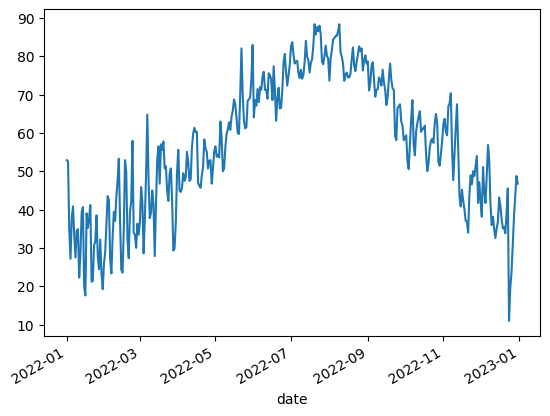

In [16]:
# Sorting dataframe by date
df_temp = df_temp.sort_values(by='date')
# Plotting temperatures as a time series using pandas
df_temp['avgTemp_F'].plot()

## Aggregating trips per day

In [17]:
# Checking column to use for aggregating trips
df.columns

Index(['ride_id', 'rideable_type', 'start_time', 'end_time',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp_C', 'avgTemp_F'],
      dtype='object')

In [18]:
# Creating a new dataframe to count trips using 'ride_id' and groupby 'date'
df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [19]:
# Checking grouped dataframe
df_group.head()

,date,ride_id
0,2022-01-01,592
1,2022-01-02,1248
2,2022-01-03,832
3,2022-01-04,934
4,2022-01-05,914


## Merging grouped and main dataframe

In [20]:
# Renaming 'ride_id' column in grouped dataframe
df_group.rename(columns = {'ride_id':'daily_rides'}, inplace = True)

# Merging dataframes with checks 
df = df.merge(df_group, on = "date", how = 'outer', indicator = True)
print(df['_merge'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2022-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2022-01-02'].shape) # Second check 

# Setting date as index in df_temp dataframe
df_temp = df.set_index('date')

print(df_temp.columns)

_merge
both          895485
left_only          0
right_only         0
Name: count, dtype: int64
Shape of January 1st is (592, 18)
Shape of January 2nd is (1248, 18)
Index(['ride_id', 'rideable_type', 'start_time', 'end_time',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp_C', 'avgTemp_F', 'daily_rides', '_merge'],
      dtype='object')


#### The output above shows that the merge was successful with all rows accounted for (895485) according to the '_merge' column counts. The two checks performed of the shape of January 1st and 2nd show that the values are consistent with the dataframe we created before (592 for Jan. 1st and 1248 for Jan. 2nd). Lastly, checking the columns shows that we successfully added the 'daily_rides' column to our main dataframe.

In [21]:
# Checking df_temp
df_temp.head()

,ride_id,rideable_type,start_time,end_time,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp_C,avgTemp_F,daily_rides,_merge
date,,,,,,,,,,,,,,,,,
2022-01-01,115C78C3039FFA89,electric_bike,2022-01-01 09:21:14,2022-01-01 09:35:46,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,11.6,52.88,592,both
2022-01-01,7FFD810CAA7A919E,classic_bike,2022-01-01 02:43:56,2022-01-01 02:43:57,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,11.6,52.88,592,both
2022-01-01,E715E8432031B72C,classic_bike,2022-01-01 02:13:33,2022-01-01 02:18:42,Essex Light Rail,JC038,Washington St,JC098,40.712774,-74.036486,40.724294,-74.035483,member,11.6,52.88,592,both
2022-01-01,BF1B7B1E1961A87B,electric_bike,2022-01-01 17:18:46,2022-01-01 18:55:25,Grand St,JC102,W 27 St & 7 Ave,6247.06,40.715178,-74.037683,40.746647,-73.993915,casual,11.6,52.88,592,both
2022-01-01,4A01F0E53C6F4386,electric_bike,2022-01-01 11:23:32,2022-01-01 11:29:27,Christ Hospital,JC034,Hoboken Terminal - Hudson St & Hudson Pl,HB101,40.734786,-74.050444,40.735938,-74.030305,member,11.6,52.88,592,both


## Dual Axis Charts

### Twin Axis

In [26]:
# Applying ggplot style to plots
plt.style.use('default')

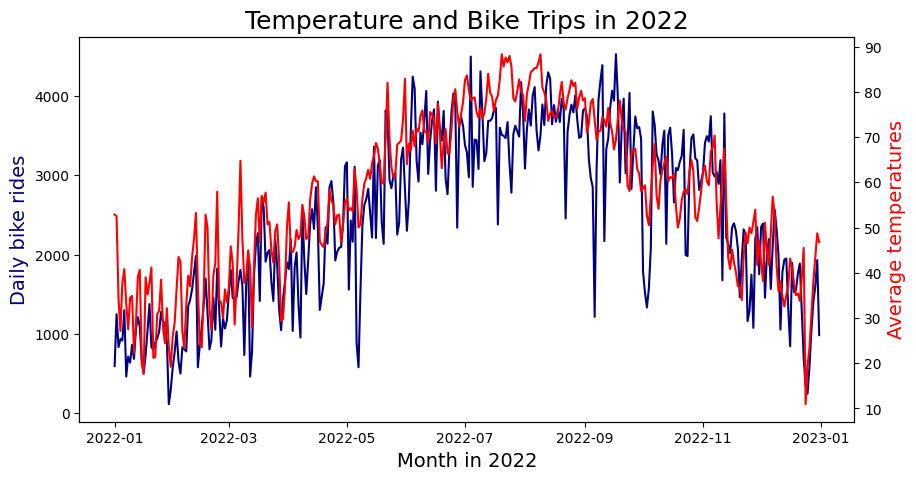

In [27]:
# Creating figure and axis objects with subplots() and details

fig,ax = plt.subplots(figsize=(10, 5))

# Making a plot of the bike rides
ax.plot(df_temp['daily_rides'], color = "navy")
ax.set_xlabel("Month in 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Daily bike rides", color = "navy", fontsize = 14) # set y-axis label

# Creating the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatures on the y-axis using second axis object
ax2.plot(df_temp["avgTemp_F"], color = "red")
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and Bike Trips in 2022', fontsize = 18)

# Saving figure to working folder
plt.savefig('temp_and_trips_twin.png',
             bbox_inches='tight')
plt.show()

#### The twin axis chart above utilizes the subplots() function of matplotlib. I first defined the 'fig,ax' (figure and axes) object as subplots of the chart and define the size using 'figsize'. Next, I created a plot for the bike rides using an 'ax' subplot and define details such as color of the line, x and y labels and their color and font size. After that, I created a twin axis object (ax2) using matplotlib's .twinx() function to plot the temperatures on the same plot with it's y-axis and scale on the right side of the plot. Then, I plot the temperatures on the same plot using the 'ax2' object and define its details (line color, y-axis label, font size and color). Finally, I set the chart title, save the figure and show the plot using matplotlib's plt.show() function.

### Two Plots in Same Figure

In [28]:
# Applying ggplot style
plt.style.use('ggplot')

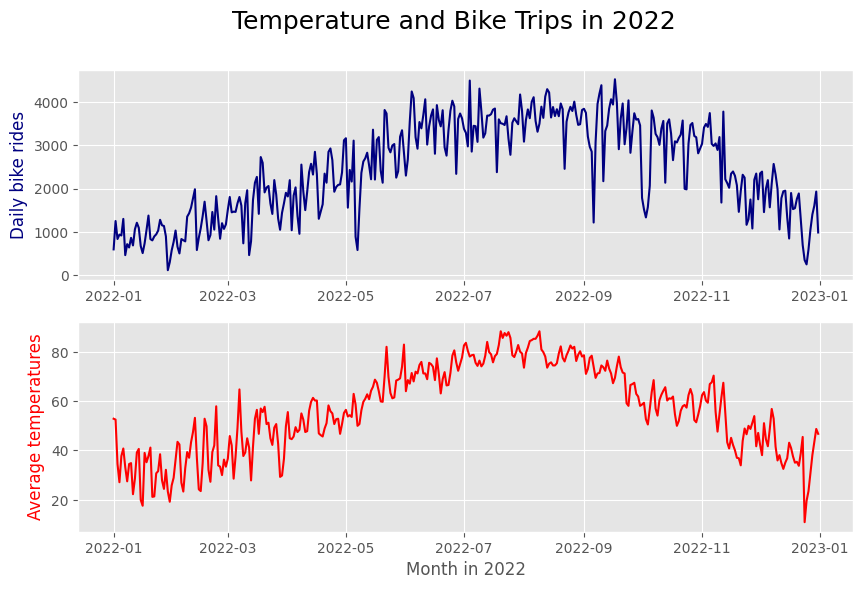

In [29]:
# Creating figure and axis objects with subplots() and details

fig,ax = plt.subplots(2, figsize =(10, 6))

# Making a plot of the bike rides
ax[0].plot(df_temp['daily_rides'],color = "navy")
ax[0].set_ylabel("Daily bike rides",color = "navy", fontsize = 12) # set y-axis label for first plot

# Make a plot with the temperatues on the y-axis using second axis object
ax[1].plot(df_temp["avgTemp_F"], color = "red")
ax[1].set_xlabel("Month in 2022", fontsize = 12) # set x-axis label
ax[1].set_ylabel("Average temperatures", color = "red",fontsize=12) # set y-axis label for second plot

# Setting title for entire figure
plt.suptitle('Temperature and Bike Trips in 2022', fontsize = 18)

# Saving figure to working folder
plt.savefig('temp_and_trips_double.png',
             bbox_inches='tight')

plt.show()

#### In the chart above I created dual chart to show the bike trips and temperature on separate charts but within the same figure. To do this i begin the same way as the twin axis plot by defining the 'fig,ax' object, however this time I add an argument in the subplots() function, as seen by the '2' before setting the figsize, to indicate that I want 2 different charts within the same figure. Next, I plot the bike rides and temperatures the same as before but with a few key differences. First, I use an index attached to the object to specify which plot it is for. That can be seen as ax[0] for the bike rides plot and ax[1] for the temperature plot. Another difference is I moved the code for labeling the x-axis to the bottom plot, the ax[1] for temperature, so that the x-axis label would be put on the bottom of the chart rather than in the middle under the bike rides chart. Lastly, I used matplotlib's plt.suptitle() function to set a title for the entore figure rather than using the plt.title() function that would have placed the title above whicher chart I associated it with. Then, I saved the firgure to my working folder and showed the plot.